# Figure 5

In [1]:
setwd("/Users/sy3115/Desktop/figures")

In [2]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)
library(ggplot2)
library(ggpubr)
library(ggtext)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




Clear environment: 

In [3]:
rm(list=ls())

Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

In [4]:
## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"

## Read in dataframe (total)
df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv")
df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv")

Read in the suspicious, rare and common files. 
Suspicious indels are sAF ≤ 10^-4 and rAF > 10^-4. 
Rare indels are sAF ≤ 10^-4 and rAF ≤ 10^-4. 
Common indels are sAF > 10^-4.

In [5]:
## Read in suspicious 
sus_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv")
sus_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv")
sus_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv")
sus_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv")

sus_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv")
sus_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv")
sus_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv")
sus_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv")


## Read in rare 
rare_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_RareIndels.lt50bp.csv")
rare_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_RareIndels.lt50bp.csv")
rare_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_RareIndels.lt50bp.csv")
rare_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_RareIndels.lt50bp.csv")

rare_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_RareIndels.lt50bp.csv")
rare_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_RareIndels.lt50bp.csv")
rare_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_RareIndels.lt50bp.csv")
rare_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_RareIndels.lt50bp.csv")

## Read in common
common_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_CommonIndels.lt50bp.csv")
common_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_CommonIndels.lt50bp.csv")
common_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_CommonIndels.lt50bp.csv")
common_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_CommonIndels.lt50bp.csv")

common_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_CommonIndels.lt50bp.csv")
common_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_CommonIndels.lt50bp.csv")
common_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_CommonIndels.lt50bp.csv")
common_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_CommonIndels.lt50bp.csv")


Define rare. 

In [6]:
rare = (1 * 10^-4)

Read in ClinVar TSV file: 

In [7]:
clinvar = fread('ClinVar_2023_03_18.tsv', sep='\t', header = FALSE, quote="")

Define ClinVar classfications. 

In [8]:
benign = c('Benign', 'Benign/Likely_benign', 'Benign|_drug_response')
LB = c('Likely_benign', 'Likely_benign|_drug_response|_other',
       'Likely_benign|_other')
conflict = c('Conflicting_interpretations_of_pathogenicity',
             'Conflicting_interpretations_of_pathogenicity|_association',
             'Conflicting_interpretations_of_pathogenicity|_drug_response',
             'Conflicting_interpretations_of_pathogenicity|_drug_response|_other',
             'Conflicting_interpretations_of_pathogenicity|_other',
             'Conflicting_interpretations_of_pathogenicity|_risk_factor',
             'Uncertain_significance',
             'Uncertain_significance|_risk_factor')  #conflict and uncertain significance
LP = c('Likely_pathogenic',
       'Likely_pathogenic|_risk_factor')
patho = c('Pathogenic',
          'Pathogenic/Likely_pathogenic',
          'Pathogenic/Likely_pathogenic|_other', 'Pathogenic|_Affects',
          'Pathogenic|_other', 'Pathogenic|_protective',
          'Pathogenic|_risk_factor')
other = c('Affects', '\\N', 'association',
          'confers_sensitivity', 'drug_response', 'not_provided', 'other',
          'protective', 'risk_factor')

Define bp ranges for sliding windows. 

In [9]:
bp_range = c("10", "20", "30", "40")

Give ClinVar file a VarID column. 

In [10]:
clinvar$VarID = paste0(clinvar$V1, "-", clinvar$V2, "-", clinvar$V3, "-", clinvar$V4)

Merge sAF and rAF with ClinVar and keep only the rows that are in ClinVar. Remove any duplicates, if any. 

In [11]:
## Merge sAF and rAF with clinvar and ONLY KEEP THE ROWS THAT ARE IN CLINVAR 
df_1_clinvar = merge(df_1, clinvar, by = "VarID") 
df_2_clinvar = merge(df_2, clinvar, by = "VarID") 

## Remove any duplicates, if any 
df_1_clinvar = distinct(df_1_clinvar) 
df_2_clinvar = distinct(df_2_clinvar) 

Identify rare sAF indels that are benign/likely benign or pathogenic/likely pathogenic in both datasets. 

In [12]:
## gnomAD 
df_1_B_LB = df_1_clinvar %>% filter(V10 %in% benign | V10 %in% LB) %>% filter (sAF <= rare) 
df_1_P_LP = df_1_clinvar %>% filter(V10 %in% patho | V10 %in% LP) %>% filter (sAF <= rare) 


## IGM
df_2_B_LB = df_2_clinvar %>% filter(V10 %in% benign | V10 %in% LB) %>% filter (sAF <= rare) 
df_2_P_LP = df_2_clinvar %>% filter(V10 %in% patho | V10 %in% LP) %>% filter (sAF <= rare) 

Label indels with a log_key. A benign/likely benign indel has a log_key of 0. A pathogenic/likely pathogenic indel has a log key of 1. 

In [13]:
## Give benign/LB a 0 log_key
## Give patho/LP a 1 log_key 
df_1_B_LB$log_key = 0 
df_1_P_LP$log_key = 1 

#IGM
df_2_B_LB$log_key = 0 
df_2_P_LP$log_key = 1 

Create output dataframes for bargraphs and logistic regression graphs. For the bar graph, we want to zoom into rAF < 0.05 for the 10bp window. 

In [14]:
df_1_output = rbind(df_1_B_LB, df_1_P_LP) %>% select (sAF, rAF_bp10, log_key)

df_2_output = rbind(df_2_B_LB, df_2_P_LP)  %>% select (sAF, rAF_bp10, log_key)

# Mean Square Error 

In [15]:
## Make logistic regression of the rAF/sAF dataframes 
model_rAF_df1  =  glm(formula = log_key ~ rAF_bp10, family = "binomial", data = df_1_output)
model_rAF_df2  = glm(formula = log_key ~ rAF_bp10 , family = "binomial", data = df_2_output)

model_sAF_df1  = glm(formula = log_key ~ sAF, family = "binomial", data = df_1_output)
model_sAF_df2  =  glm(formula = log_key ~ sAF, family = "binomial", data = df_2_output)

## Make dataframe with predicted and actual values 
pred_actual_rAF_df1 = data.frame(pred = predict(model_rAF_df1), actual = df_1_output$rAF_bp10)
pred_actual_rAF_df2 = data.frame(pred = predict(model_rAF_df2), actual = df_2_output$rAF_bp10)

pred_actual_sAF_df1 = data.frame(pred = predict(model_sAF_df1), actual = df_1_output$sAF)
pred_actual_sAF_df2 = data.frame(pred = predict(model_sAF_df2), actual = df_2_output$sAF)


## Mean square error calculation 
MSE_rAF_df1 = mean((pred_actual_rAF_df1$actual - pred_actual_rAF_df1$pred)^2)
MSE_rAF_df2 = mean((pred_actual_rAF_df2$actual - pred_actual_rAF_df2$pred)^2)
MSE_sAF_df1 = mean((pred_actual_sAF_df1$actual - pred_actual_sAF_df1$pred)^2)
MSE_sAF_df2 = mean((pred_actual_sAF_df2$actual - pred_actual_sAF_df2$pred)^2)

MSE_rAF_df1
MSE_rAF_df2
MSE_sAF_df1
MSE_sAF_df2


[1] 0.350498

[1] 4.142719

[1] 0.5752192

[1] 4.925144

In [16]:
####### For the bargraph, we want to zoom into rAF < 0.05. 
bar_df_1 = df_1_output %>% filter(rAF_bp10 < 0.05)
bar_df_2 = df_2_output %>% filter(rAF_bp10 < 0.05)

Create bargraphs.

In [17]:
bargraph_df_1 = ggplot (bar_df_1, aes(x = rAF_bp10 , fill = as.factor(log_key))) + geom_histogram(binwidth = 0.001, position = "dodge") + scale_y_continuous (trans = scales::pseudo_log_trans(), breaks = c(1,100, 1000, 10000)) + scale_fill_manual(labels = c("B/LB", "P/LP"), values = c("#000000", "#989898")) + labs( y = "gnomAD Indels (log)", x = "rAF (10bp Sliding Window)", fill = "Classification") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.position = c(0.85,0.8), legend.background = element_rect(fill = "white", color = "grey"), panel.background = element_rect(fill = "white", color = "grey"), panel.grid.major = element_line(color = "white"), plot.margin = margin( 1, 1, 1, 1, "cm"), plot.title = element_text(hjust = 0.5, size = 32, margin = margin( 1, 1, 1, 1, "cm")), axis.title.y = element_text(margin = margin( 0.5, 0.5, 0.5, 0.5, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) 


bargraph_df_2 = ggplot (bar_df_2, aes(x = rAF_bp10 , fill = as.factor(log_key))) + geom_histogram(binwidth = 0.001, position = "dodge") + scale_y_continuous (trans = scales::pseudo_log_trans(), breaks = c(1,100, 1000, 10000)) + scale_fill_manual(labels = c("B/LB", "P/LP"), values = c("#000000", "#989898")) + labs( y = "IGM Indels (log)", x = "rAF (10bp Sliding Window)", fill = "Classification") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.position = c(0.85, 0.8), legend.background = element_rect(fill = "white", color = "grey") , panel.background = element_rect(fill = "white", color = "grey"), panel.grid.major = element_line(color = "white"), plot.margin = margin( 1, 1, 1, 1, "cm"), plot.title = element_text(hjust = 0.5, size = 32, margin = margin( 1, 1, 1, 1, "cm")), axis.title.y = element_text(margin = margin( 0.5, 0.5, 0.5, 0.5, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm")))

Create logistic regression graphs with rAF on the x-axis. 

In [18]:
logreg_df_1 = ggplot(df_1_output, aes(x=rAF_bp10, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0,1.5) + labs( y = "Log Odds (P/LP)", x = "gnomAD rAF") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 1.5 ,y = 0.9,inherit.aes = FALSE,label = paste0("MSE: ", round(MSE_rAF_df1,2) ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + coord_cartesian(clip = "off") + geom_text(x = -0.23 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + geom_text(x = -0.23 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10)
                                                                                                                                                                            

logreg_df_2 = ggplot(df_2_output, aes(x=rAF_bp10, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + labs( y = "Log Odds (P/LP)", x = "IGM rAF") +  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin(1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 1.5 ,y = 0.9,inherit.aes = FALSE,label = paste0("MSE: ", round(MSE_rAF_df2,2) ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + coord_cartesian(clip = "off") + geom_text(x = -0.23 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + geom_text(x = -0.23 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10)

Find the logistic regression for sAF 

In [19]:
sAF_logreg_df_1 = ggplot(df_1_output, aes(x=sAF, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0, 0.0001) + labs( y = "Log Odds (P/LP)", x = "gnomAD sAF") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20) , plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 0.0001 ,y = 0.9,inherit.aes = FALSE,label = paste0("MSE: ", round(MSE_sAF_df1,2) ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + coord_cartesian(clip = "off") + geom_text(x = -0.000015 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + geom_text(x =  -0.000015 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10)

sAF_logreg_df_2 = ggplot(df_2_output, aes(x=sAF, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0, 0.0001) + labs( y = "Log Odds (P/LP)", x = "IGM sAF") +  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 0.0001 ,y = 0.9,inherit.aes = FALSE,label = paste0("MSE: ", round(MSE_sAF_df2,2)) ,check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + coord_cartesian(clip = "off") + geom_text(x =  -0.000015 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10) + geom_text(x =  -0.000015 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 10)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


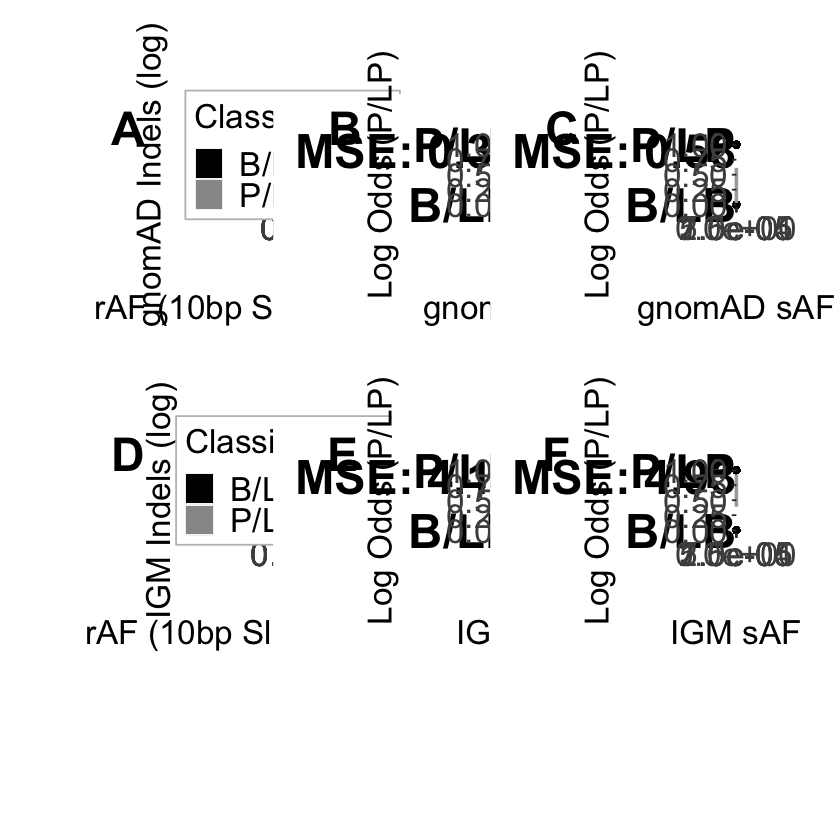

In [20]:
graph_summary = ggarrange(print(bargraph_df_1), print(logreg_df_1), print(sAF_logreg_df_1), print(bargraph_df_2), print(logreg_df_2), print(sAF_logreg_df_2), labels = c("A", "B", "C", "D", "E", "F"), ncol = 3, nrow = 2, font.label = list(size = 28, color = "black")) + theme(plot.margin = unit(c(2,2,2,2), "cm"))

graph_summary 

In [21]:
ggsave("Fig5.jpg", width = 80, height = 40, units = c("cm"), dpi = 300)

# Quantify the number of indels in each category.

In [22]:

conditions = c("sus", "rare", "common")

categories = c("benign", "LB", "VUS/other", "LP", "patho" )

for (i in conditions ) {
  for (j in categories) {
    ## get temp variable for the condition 
    condition_df1 = paste0(i, "_bp_10_df_1")
    condition_df2 = paste0(i, "_bp_10_df_2")
  
    ## set a temp variable for a clinvar merge 
    clinvar_cond_df1 = paste0("clinvar_", i, "_bp_10_df_1")
    clinvar_cond_df2 = paste0("clinvar_", i, "_bp_10_df_2")
    
    ## merge with clinvar
    assign (clinvar_cond_df1, merge(get(condition_df1), clinvar, by = "VarID"))
    assign (clinvar_cond_df2, merge(get(condition_df2), clinvar, by = "VarID"))
    
    ## get a dataframe only for the category (ie. benign, LB, conflict, LP, patho, other)
    if (j != "VUS/other") {
      ##  set a temp variable for a clinvar merge
      category_cond_df1 = paste0(j , "_", i, "_bp_10_df1")
      category_cond_df2 = paste0(j , "_", i, "_bp_10_df2")
      
      #assign temp variable
      assign (category_cond_df1, get(clinvar_cond_df1) %>% filter(V10 %in% get(j)))
      assign (category_cond_df2, get(clinvar_cond_df2) %>% filter(V10 %in% get(j)))
    }
    
    else {
      ##  set a temp variable for a clinvar merge
      category_cond_df1 = paste0("VUS_other_", i, "_bp_10_df1")
      category_cond_df2 = paste0("VUS_other_", i, "_bp_10_df2")
      
      #assign temp variable
      assign (category_cond_df1, get(clinvar_cond_df1) %>% filter(V10 %in% other | V10 %in% conflict))
      assign (category_cond_df2, get(clinvar_cond_df2) %>% filter(V10 %in% other | V10 %in% conflict))
    }
    
  }
}

## make the df for each category for db 1 
common_categories_df1 = c(nrow(benign_common_bp_10_df1), nrow(LB_common_bp_10_df1), nrow(VUS_other_common_bp_10_df1), nrow(LP_common_bp_10_df1), nrow(patho_common_bp_10_df1))

sus_categories_df1 = c(nrow(benign_sus_bp_10_df1), nrow(LB_sus_bp_10_df1), nrow(VUS_other_sus_bp_10_df1), nrow(LP_sus_bp_10_df1), nrow(patho_sus_bp_10_df1))

rare_categories_df1 = c(nrow(benign_rare_bp_10_df1), nrow(LB_rare_bp_10_df1), nrow(VUS_other_rare_bp_10_df1), nrow(LP_rare_bp_10_df1), nrow(patho_rare_bp_10_df1))

categories_df1 = data.frame(categories, common_categories_df1, sus_categories_df1, rare_categories_df1)


## make the df for each category for db 2
common_categories_df2 = c(nrow(benign_common_bp_10_df2), nrow(LB_common_bp_10_df2), nrow(VUS_other_common_bp_10_df2), nrow(LP_common_bp_10_df2), nrow(patho_common_bp_10_df2))

sus_categories_df2 = c(nrow(benign_sus_bp_10_df2), nrow(LB_sus_bp_10_df2), nrow(VUS_other_sus_bp_10_df2), nrow(LP_sus_bp_10_df2), nrow(patho_sus_bp_10_df2))

rare_categories_df2 = c(nrow(benign_rare_bp_10_df2), nrow(LB_rare_bp_10_df2), nrow(VUS_other_rare_bp_10_df2), nrow(LP_rare_bp_10_df2), nrow(patho_rare_bp_10_df2))

categories_df2 = data.frame(categories, common_categories_df2, sus_categories_df2, rare_categories_df2)

categories_df1
categories_df2

fwrite(categories_df1, "2023-05-08_pvalues_clinvar_gnomad.csv")
fwrite(categories_df2, "2023-05-08_pvalues_clinvar_igm.csv")


categories,common_categories_df1,sus_categories_df1,rare_categories_df1
<chr>,<int>,<int>,<int>
benign,6962,458,1935
LB,1885,871,5559
VUS/other,1445,920,9663
LP,23,26,1304
patho,227,136,7975


categories,common_categories_df2,sus_categories_df2,rare_categories_df2
<chr>,<int>,<int>,<int>
benign,1556,59,101
LB,723,229,313
VUS/other,1766,876,4951
LP,43,27,638
patho,452,166,4086


# Make Table S9/S10
Find the percentage of suspicious indels for each bp window for each of the following categories: Benign/likely benign (LB), pathogenic (patho) and likey pathogenic (LP) 

In [23]:
cat = c("benign", "LB", "patho", "LP")

## Find rare 
for (i in cat) {
  ## set var 
  cat_1 = paste0(i, "_rare_sAF_df1")
  cat_2 = paste0(i, "_rare_sAF_df2")
  
  #assign
  assign(cat_1, df_1_clinvar %>% filter(sAF <= rare) %>% filter(V10 %in% get(i)))
  assign(cat_2, df_2_clinvar %>% filter(sAF <= rare) %>% filter(V10 %in% get(i)))
}

## Find percentage
for (i in bp_range) {
  for (j in cat) {
    ## get denominator (rare)
    rare_sAF_df1 = paste0(j, "_rare_sAF_df1")
    rare_sAF_df2 = paste0(j, "_rare_sAF_df2")
    
    ## set percent output 
    prct_sus_1 = paste0("prct_bp_", i, "_", j, "_df1")
    prct_sus_2 = paste0("prct_bp_", i, "_", j, "_df2")
    
    ## set rAF window 
    temp_window = paste0("rAF_bp", i)
    
    ## assign percentage 
    assign (prct_sus_1, paste0(round(nrow(get(rare_sAF_df1) %>% filter(get(temp_window) > rare)) / nrow(get(rare_sAF_df1)) * 100 , 0), "%"))
    assign (prct_sus_2, paste0(round(nrow(get(rare_sAF_df2) %>% filter(get(temp_window) > rare)) / nrow(get(rare_sAF_df2)) * 100 , 0), "%"))
    
  }
}

## make df that show the percentage of suspicious indels for each categories for dataframe 1 
rare_sAF_df1 = c(nrow(benign_rare_sAF_df1), nrow(LB_rare_sAF_df1), nrow(patho_rare_sAF_df1), nrow(LP_rare_sAF_df1))
prct_sus_10bp_df1 = c(prct_bp_10_benign_df1, prct_bp_10_LB_df1, prct_bp_10_patho_df1, prct_bp_10_LP_df1)
prct_sus_20bp_df1 = c(prct_bp_20_benign_df1, prct_bp_20_LB_df1, prct_bp_20_patho_df1, prct_bp_20_LP_df1)
prct_sus_30bp_df1 = c(prct_bp_30_benign_df1, prct_bp_30_LB_df1, prct_bp_30_patho_df1, prct_bp_30_LP_df1)
prct_sus_40bp_df1 = c(prct_bp_40_benign_df1, prct_bp_40_LB_df1, prct_bp_40_patho_df1, prct_bp_40_LP_df1)

prct_sus_cat_df_1 = data.frame (cat, rare_sAF_df1, prct_sus_10bp_df1, prct_sus_20bp_df1, prct_sus_30bp_df1, prct_sus_40bp_df1)


## make df that show the percentage of suspicious indels for each categories for dataframe 2 
rare_sAF_df2 = c(nrow(benign_rare_sAF_df2), nrow(LB_rare_sAF_df2), nrow(patho_rare_bp_10_df2), nrow(LP_rare_sAF_df2))
prct_sus_10bp_df2 = c(prct_bp_10_benign_df2, prct_bp_10_LB_df2, prct_bp_10_patho_df2, prct_bp_10_LP_df2)
prct_sus_20bp_df2 = c(prct_bp_20_benign_df2, prct_bp_20_LB_df2, prct_bp_20_patho_df2, prct_bp_20_LP_df2)
prct_sus_30bp_df2 = c(prct_bp_30_benign_df2, prct_bp_30_LB_df2, prct_bp_30_patho_df2, prct_bp_30_LP_df2)
prct_sus_40bp_df2 = c(prct_bp_40_benign_df2, prct_bp_40_LB_df2, prct_bp_40_patho_df2, prct_bp_40_LP_df2)

prct_sus_cat_df_2 = data.frame (cat, rare_sAF_df2, prct_sus_10bp_df2, prct_sus_20bp_df2, prct_sus_30bp_df2, prct_sus_40bp_df2)

prct_sus_cat_df_1
prct_sus_cat_df_2



cat,rare_sAF_df1,prct_sus_10bp_df1,prct_sus_20bp_df1,prct_sus_30bp_df1,prct_sus_40bp_df1
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
benign,2393,19%,23%,25%,27%
LB,6430,14%,18%,21%,22%
patho,8111,2%,3%,3%,4%
LP,1330,2%,3%,4%,5%


cat,rare_sAF_df2,prct_sus_10bp_df2,prct_sus_20bp_df2,prct_sus_30bp_df2,prct_sus_40bp_df2
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
benign,160,37%,43%,44%,45%
LB,542,42%,51%,54%,55%
patho,4086,4%,6%,7%,8%
LP,665,4%,6%,9%,10%


# Find the number of suspicious by sAF P/LP indels that have a rAF > 1% 

In [24]:
for (i in bp_range) {

  temp_df1 = paste0("bp_", i,"_P_LP_rAF_gt_1_df1")
  temp_df2 = paste0("bp_", i,"_P_LP_rAF_gt_1_df2")
  
  ## set rAF window 
  temp_window = paste0("rAF_bp", i)
  
  assign(temp_df1, nrow(df_1_clinvar %>% filter (sAF <= rare & get(temp_window) > rare) %>%  filter(V10 %in% patho | V10 %in% LP) %>% filter(get(temp_window) > 0.01)))
  assign(temp_df2, nrow(df_2_clinvar %>% filter (sAF <= rare & get(temp_window) > rare) %>% filter(V10 %in% patho | V10 %in% LP) %>% filter(get(temp_window) > 0.01)))
}

P_LP_rAF_gt_1_df1 = c(bp_10_P_LP_rAF_gt_1_df1, bp_20_P_LP_rAF_gt_1_df1, bp_30_P_LP_rAF_gt_1_df1, bp_40_P_LP_rAF_gt_1_df1)
P_LP_rAF_gt_1_df2 = c(bp_10_P_LP_rAF_gt_1_df2, bp_20_P_LP_rAF_gt_1_df2, bp_30_P_LP_rAF_gt_1_df2, bp_40_P_LP_rAF_gt_1_df2)

dataframe_P_LP_gt_1 = data.frame(bp_range, P_LP_rAF_gt_1_df1, P_LP_rAF_gt_1_df2)

dataframe_P_LP_gt_1


bp_range,P_LP_rAF_gt_1_df1,P_LP_rAF_gt_1_df2
<chr>,<int>,<int>
10,15,14
20,28,21
30,45,26
40,56,29


# Supplementary Excel 1 and Excel 2 

Make supplementary excel files that show the number of pathogenic/likely pathogenic and benign/likely benign indels there are for each rAF value (rounded to the 6th decimal place) for both datasets. 

In [25]:
### Supplementary excel 1: for database 1 
df_1_B_LB$rAF_bp10 = round(df_1_B_LB$rAF_bp10, 6 )
df_1_P_LP$rAF_bp10 = round(df_1_P_LP$rAF_bp10, 6 )


df_1_freq_B_LB =  df_1_B_LB %>% group_by(rAF_bp10) %>% summarise(count_B_LB=n())
df_1_freq_P_LP =  df_1_P_LP %>% group_by(rAF_bp10) %>% summarise(count_P_LP=n())

df_1_freq = merge(df_1_freq_B_LB, df_1_freq_P_LP, by = "rAF_bp10", all = TRUE)
df_1_freq[is.na(df_1_freq)] = 0

df_1_freq

fwrite(df_1_freq, "supplementary_excel_1.csv")

rAF_bp10,count_B_LB,count_P_LP
<dbl>,<dbl>,<dbl>
2.0e-06,1225,3478
3.0e-06,159,190
4.0e-06,816,1633
5.0e-06,81,65
6.0e-06,557,856
7.0e-06,93,64
8.0e-06,448,536
9.0e-06,84,42
1.0e-05,361,376


In [26]:
### Supplementary excel 1: for database 2
df_2_B_LB$rAF_bp10 = round(df_2_B_LB$rAF_bp10, 6 )
df_2_P_LP$rAF_bp10 = round(df_2_P_LP$rAF_bp10, 6 )


df_2_freq_B_LB =  df_2_B_LB %>% group_by(rAF_bp10) %>% summarise(count_B_LB=n())
df_2_freq_P_LP =  df_2_P_LP %>% group_by(rAF_bp10) %>% summarise(count_P_LP=n())

df_2_freq = merge(df_2_freq_B_LB, df_2_freq_P_LP, by = "rAF_bp10", all = TRUE)
df_2_freq[is.na(df_2_freq)] = 0

df_2_freq

fwrite(df_2_freq, "supplementary_excel_2.csv")

rAF_bp10,count_B_LB,count_P_LP
<dbl>,<dbl>,<dbl>
1.3e-05,100,2446
1.4e-05,7,42
1.5e-05,4,21
1.6e-05,4,16
1.7e-05,2,13
1.8e-05,0,5
1.9e-05,0,6
2.0e-05,0,4
2.1e-05,1,7
